# File Operations


### Working with files and directories

There are several modules in the Python Standard Library which can help us **create**, **copy**, **move**, **rename**, and **remove** files and directories:

In [29]:
import os

os.remove('data/useless_file.txt')
os.rename('data/wrong_name.txt', 'data/right_name.txt')
os.mkdir('data/backups')

- Here we used the `os` module to `.remove()` and `.rename()` some files
- We created a new directory using `.mkdir()` *'make directory'*

In [30]:
import shutil

shutil.copy('data/right_name.txt', 'data/right_name_copy.txt')
shutil.move('data/right_name_copy.txt', 'data/backups/right_name_copy.txt')

'data/backups/right_name_copy.txt'

- As with `os`, the `shutil` module methods requiring two arguments are provided in the order `(source, destination)`

The methods shown here from `os` and `shutil` with throw **errors** if certain conditions are met:
- `.copy()`, `.move()`, `.remove()` and `.rename()` operations if the **source** file or directory **does not exist** 
- `.mkdir()` operations if the **destination** directory **already exists**

... although note that `shutil.move()` when used with a file will **overwrite** an existing file at the destination.

#### Listing files using the `glob` module

In [31]:
from glob import glob

files = glob('data/*.txt')
files

['data/corrected_account_numbers.txt',
 'data/poem.txt',
 'data/account_numbers.txt',
 'data/summary_email.txt',
 'data/right_name.txt',
 'data/jack_email.txt']

- We have created a list of all `.txt` files in the `data` directory

### Working with text files

Python comes with the **built-in function** `open()`, which can be used to **open**, **read**, **modify** and **save** files. 

- We are likely to use other packages such as `pandas` when using tabular data file formats such as `.csv` and `.xlsx`  
... but `open()` can be useful for performing operations on **text files** such as `.txt` and `.rtf` files

#### Using the `open()` function

```python
open(file, mode='r', buffering=-1, encoding=None, errors=None, 
     newline=None, closefd=True, opener=None)
```     

The main parameters of the function are:

- `file`: this is the only required parameter and the argument provided for it should be the **path to the file** to be worked with (or the path where it is to be created)
- `mode`: this tells Python **what to do** with the given file or file location

The following table from the [documentation](https://docs.python.org/3/library/functions.html#open) shows what values can be used with `mode` parameter:

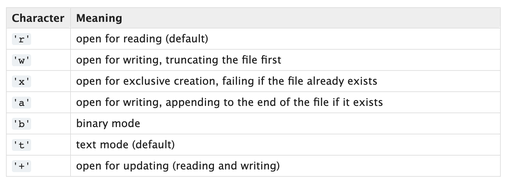

- It is possible to provide more than one of these characters at the same time, for example `'r+'`

In [32]:
email = open('data/summary_email.txt', 'r')
email

<_io.TextIOWrapper name='data/summary_email.txt' mode='r' encoding='UTF-8'>

`open()` returns an object of type `_io.TextIOWrapper`, which has a number of methods, including:

- `.read()`: returns a string of the characters in the file
- `.write()`: allows a string to be written to the file
- `.close()`: closes the file (meaning it cannot be read or written to)

#### Reading files

In [33]:
email.read()

'Hi John,\n\nThis week our profit was £52.75.\n\nKind Regards,\nDave'

- the `.read()` method returns a string of the characters in our `.txt` file
- `\n` represents a **newline** - so two in a row means there is a blank line

#### Position in the file

By calling the `.read()` method, Python has moved through the file reading each character.

In doing so it has moved what can be considered a **file pointer** from the start to the end of the file.

If we call `.read()` again, an empty string is returned:

In [34]:
email.read()

''

In [35]:
email.seek(0)
email.read()

'Hi John,\n\nThis week our profit was £52.75.\n\nKind Regards,\nDave'

- The `.seek()` method allows us to move the pointer to a **position** in the string of our choice

We could instead use `open()` and `.read()` together every time we want to read the file:

In [36]:
text = open('data/summary_email.txt', 'r').read()
text

'Hi John,\n\nThis week our profit was £52.75.\n\nKind Regards,\nDave'

- The pointer will start at position `0` upon using `open()` to `.read()` the file again

#### Using the `with` function

Although more important in systems with **concurrent processes** working with files, it is good practice to **close files** when they are no longer being used.

The `with` function can be used to **automatically open and close files** before and after the required operation(s) are made:

In [52]:
with open('data/summary_email.txt', 'r') as email:    
    text = email.read()
text

'Hi John,\n\nThis week our profit was £52.75.\n\nKind Regards,\nDave'

In [38]:
with open('data/summary_email.txt', 'r') as email:    
    lines = email.readlines()
lines

['Hi John,\n',
 '\n',
 'This week our profit was £52.75.\n',
 '\n',
 'Kind Regards,\n',
 'Dave']

- The `.readlines()` method returns a list where each element contains one line of the text file

We can now work with the returned `list` object as usual, for example using list and string **indexing** to extract part of the message:

In [39]:
lines[0]

'Hi John,\n'

In [40]:
greeting = lines[0]
space_index = greeting.index(' ')
comma_index = greeting.index(',')
name = greeting[space_index + 1 : comma_index]
name

'John'

An alternative approach to achieve this is to use the `.splitlines()` string method on the string returned by `.read()`:

In [57]:
text.splitlines()[0:3]

['Hi John,', '', 'This week our profit was £52.75.']

The `.splitlines()` method has removed the newline `\n` character sequences:
- a tidier result which may help us with subsequent operations to retrieve information  
... but means that more code would be required to re-instate the newlines if we were to modify the file and save it

#### Updating file contents

For the purposes of our example we can continue to work with the `lines` list object, and the first element of that list which we assigned to `greeting`:

In [41]:
new_name = 'Jack'
new_greeting = greeting[0 : space_index + 1] + new_name + ','
new_greeting

'Hi Jack,'

In [42]:
new_message = lines.copy()
new_message[0] = new_greeting
new_text = ''
for line in new_message:
    new_text += line
new_text

'Hi Jack,\nThis week our profit was £52.75.\n\nKind Regards,\nDave'

- the `.copy()` method is used so that we can work on `new_message` without affecting `lines`
- the first element of that list (i.e. the first line of the message) is updated to `new_greeting`
- to create a string ready to be written to a file, we add each element to the `new_text` string

#### Writing files

In [43]:
with open('data/jack_email.txt', 'w') as file:
    file.write(new_text)

- we use `'w'` as the argument for the `mode` parameter of the `open()` function
- the `.write()` method of the object returned by `open()` allows us to specify a string to be written to that file

*Note that there is no warning or confirmation required; the file will be overwritten completely with the contents on the provided string.* 

### Extracting text from Word documents and PDFs 

`.docx` and `.pdf` file formats cannot be worked with as previously shown for `.txt` files.

- The format in which they are **encoded** (and **decoded**) differs
- Attibutes such as **formatting** and **images** also need to be stored

The following **packages** were created to help such operations:
- `docx2txt` [[documentation](https://github.com/ankushshah89/python-docx2txt)]
- `pdfplumber` [[documentation](https://github.com/jsvine/pdfplumber)]

These can be installed by uncommenting and running the following code:

In [44]:
#!pip install docx2txt

In [45]:
#!pip install pdfplumber

#### Word documents

In [46]:
import docx2txt

doc_text = docx2txt.process('data/standard_operating_procedure.docx')
print(doc_text)

SITE FILE MANAGEMENT





STANDARD OPERATING PROCEDURE NO 

SOP 08

DATE RATIFIED 

Sep 2014

NEXT REVIEW DATE 

Sep 2016











POLICY STATEMENT/KEY OBJECTIVES:

To describe the procedure for the maintenance of essential documents and investigator site file at a research study site.





POLICY AUTHOR: Katie Glickman; Research Facilitator








BACKGROUND

With the large volume of documentation required for each clinical trial, a standard filing system is necessary.  From receipt of a research proposal / outline protocol, documentation for each study should be kept in a specific study file with a dedicated member of staff responsible for maintaining and updating the file.



Some sponsors may provide the Investigator Site File for specific studies, however, non-commercial studies often do not.



The International Conference of Harmonisation, Good Clinical Practice (ICH-GCP) guidelines define the study documents to be filed as essential documents “those documents which individua

Having extracted the text to a Python string, we can then work with Python as usual:

In [47]:
lines = doc_text.split('\n')
rat_date_index = lines.index('DATE RATIFIED ') + 2
rat_date = lines[rat_date_index]
rat_date

'Sep 2014'

- we used the `.split()` method with an argument of `\n` to split the string into a list where each element was one line of text from the original file
- we used `.index()` to locate a specific line and (from prior knowledge) knew that the information of interest would be found two lines later

#### PDFs

In [48]:
import pdfplumber

pdf = pdfplumber.open('data/product_list.pdf')
front_page = pdf.pages[0]

The `.open()` method creates an object with the following properties:
- `.pages`: a list of objects representing each page in the PDF
- `.metadata`: details about the file such as creation date and author

In [49]:
print(front_page.extract_text())

Product List 2019
Finished Dosage Forms (Partner Label),  
Active Pharmaceutical Ingredients 
B2B


- each `Page` object has an `.extract_text()` method, which returns a string for us to work with

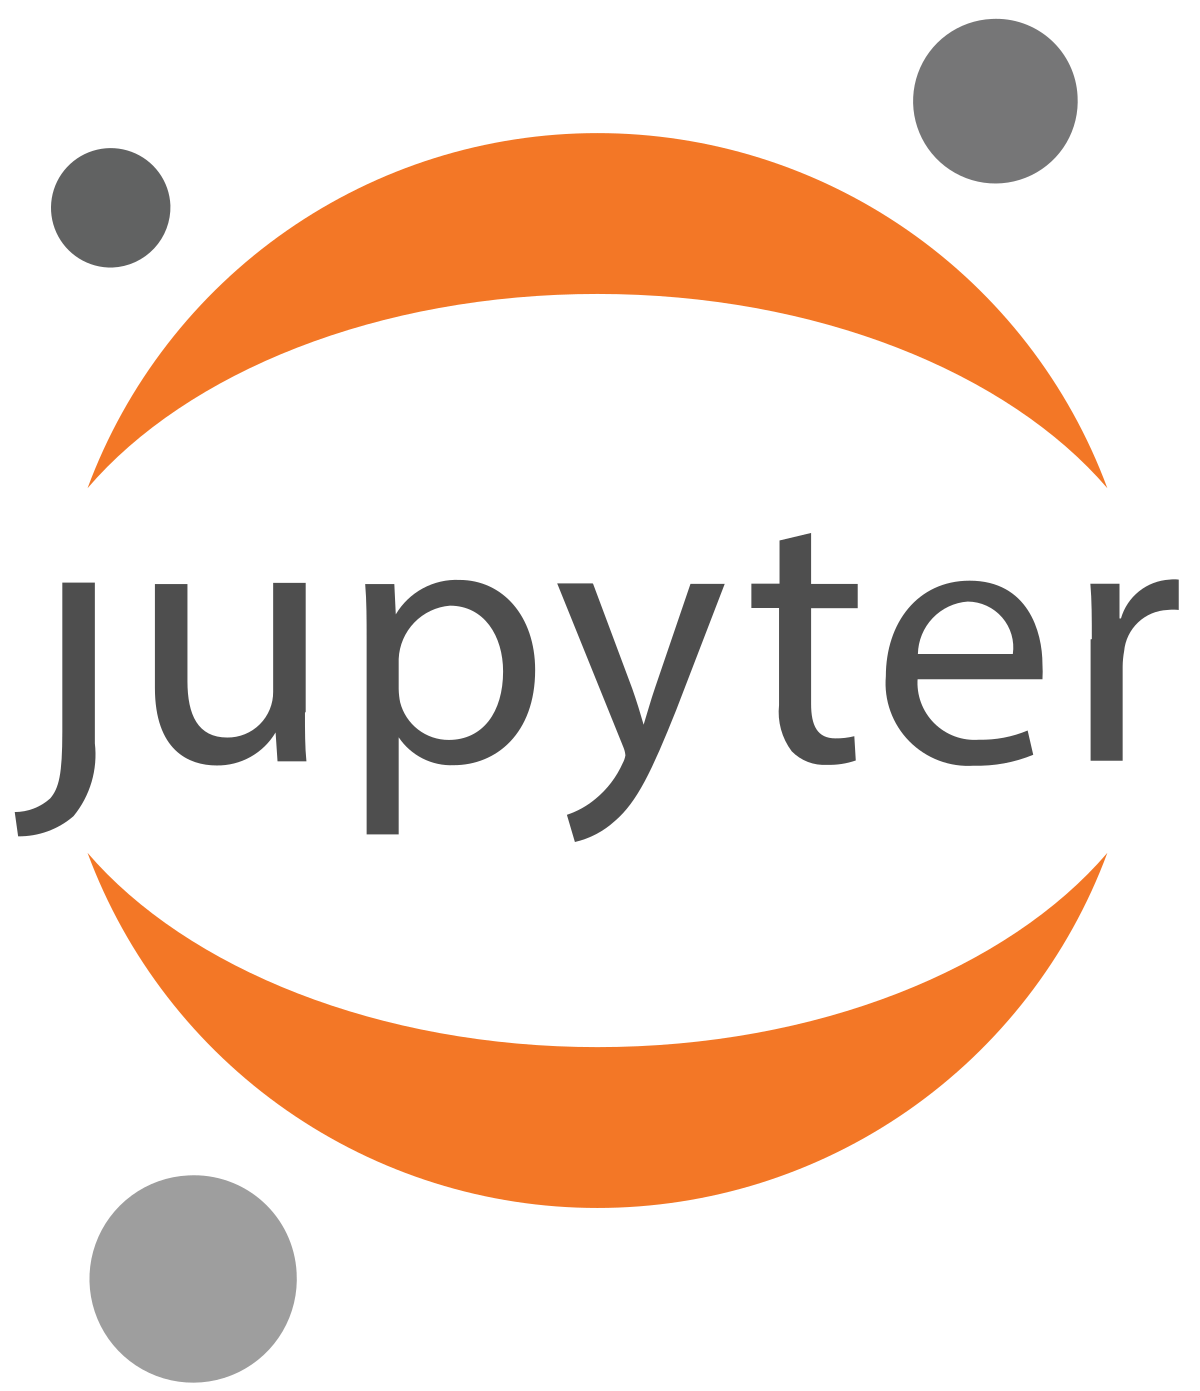

Now open the following workbook: `-operations-workbook.ipynb`